In [44]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm
import os
import matplotlib
from matplotlib import colors

In [ ]:
def to_black_white(frame):
    return np.mean(frame, axis=-1)

def crop_frames(frames, crop_region):
    (xmin, xmax), (ymin, ymax) = crop_region
    return frames[:, ymin:ymax, xmin:xmax]

def subtract_mean(frames):
    mean_frame = np.mean(frames, axis=0).astype(np.uint8)
    frames = frames - mean_frame
    # Ensure pixel values are non-negative by shifting
    min_val = np.min(frames)
    if min_val < 0:
        frames = frames - min_val  # Shift to make all values non-negative
    return frames

def load(input_path):
    cap = cv2.VideoCapture(input_path)    
    fps = cap.get(cv2.CAP_PROP_FPS)

    frames = []
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        frame = to_black_white(frame)
        frames.append(frame)
    cap.release()
    frames = np.array(frames)

    return frames, fps

def rem_background(data):
    background = np.min(data, axis=0)
    corrected = data - background
    corrected = corrected - np.min(corrected)
    return corrected, background

def video_from_frames(frames, output_path, fps=30):
    height, width = frames.shape[1:3]
    red = frames 
    zero = np.zeros_like(red)
    # frames_bgr = np.transpose(np.array([red, green, blue]), axes=[1, 2, 3, 0])
    frames_bgr = np.array(zero, zero, red)

    fourcc = cv2.VideoWriter.fourcc(*'mp4v')
    out = cv2.VideoWriter(output_path, fourcc, int(fps), (width, height))
    
    with tqdm(total=len(frames_bgr), desc="Writing video") as pbar:
        for frame in frames_bgr:
            out.write(frame.astype(np.uint8))
            pbar.update(1)
    
    out.release()

def im_plot(arrays, titles, cmap="viridis", save=None):
    n = len(arrays)
    # Compute global min and max for consistent color mapping
    vmin = min(np.min(arr) for arr in arrays)
    vmax = max(np.max(arr) for arr in arrays)
    norm = colors.Normalize(vmin=vmin, vmax=vmax)
    
    fig, axes = plt.subplots(1, n, figsize=(5*n, 4), constrained_layout=True)
    if n == 1:
        axes = [axes]
    images = []
    for ax, arr, title in zip(axes, arrays, titles):
        im = ax.imshow(arr, norm=norm, cmap=cmap)
        ax.set_title(title)
        images.append(im)
    
    # Create a single colorbar for all images
    cbar = fig.colorbar(images[0], ax=axes, orientation='vertical', fraction=0.05)
    if save is not None:
        fig.savefig(save)
    plt.show()

In [40]:
data, fps = load('D://OneDrive - Friedrich-Schiller-Universität Jena//Studium//MPSP//2. Semester//Innovation//data//iso_better.mp4')
corrected, background = rem_background(data)

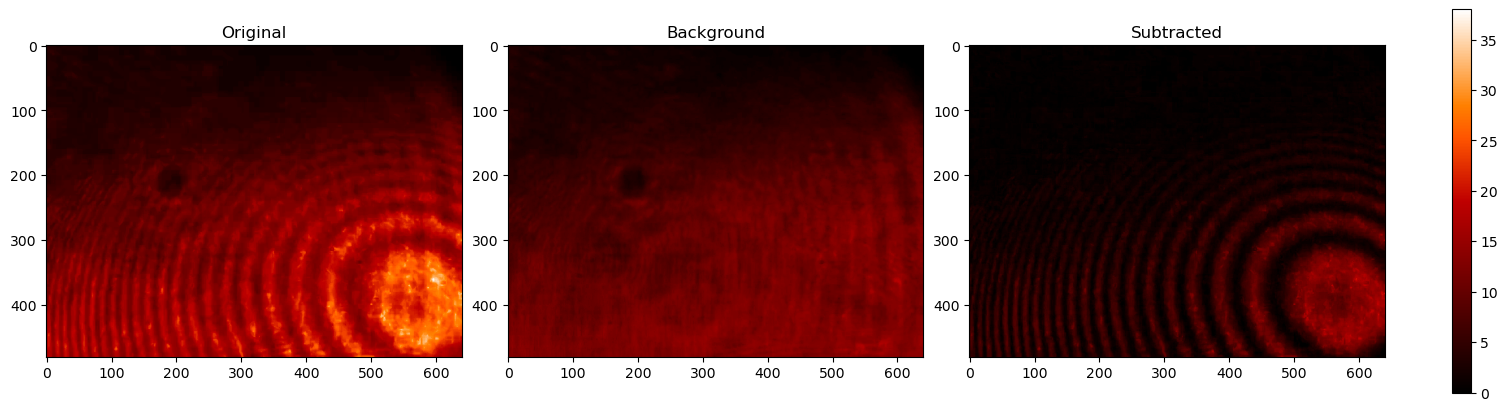

In [59]:
im_plot([data[0, :, :], background, corrected[0, :, :]], ["Original", "Background", "Subtracted"], "gist_heat", "subtraction.jpg")

In [67]:
video_from_frames(corrected, "out.mp4",fps)

Writing video: 100%|██████████| 966/966 [00:04<00:00, 208.50it/s]
